<a href="https://colab.research.google.com/github/annefrancine/Action-and-Gesture-Recognition/blob/master/Project_2%3A%20Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import  packages

In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from google.colab.patches import cv2_imshow

cv2.__version__

'4.1.2'

# Connecting the drive and accessing the files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pose_path = '/content/drive/My Drive/pose'

In [0]:
imagens_path = '/content/drive/My Drive/imagens'

# Importing the drive module

In [0]:
sys.path.append('/content/drive/My Drive/modulos')

In [6]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/modulos']

In [0]:
import extrator_POSICAO as posicao
import extrator_ALTURA as altura
import extrator_PROXIMIDADE as proximidade
import alfabeto

# Accessing pre-trained neural network

In [0]:
arquivo_proto = '/content/drive/My Drive/pose/hand/pose_deploy.prototxt'
arquivo_pesos = '/content/drive/My Drive/pose/hand/pose_iter_102000.caffemodel'

numero_pontos = 22
pares_poses = [[0, 1], [1, 2], [2, 3], [3, 4], [0, 5], [5, 6], [6, 7], [7, 8], 
              [0, 9], [9, 10], [10, 11], [11, 12], [0, 13], [13, 14], [14, 15],
              [15, 16], [0, 17], [17, 18], [18, 19], [19, 20]]

In [0]:
letras = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q',
          'R', 'S', 'T', 'U', 'V', 'W']

# Read the model loaded in Step 3

In [0]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

# Loading an image 

In [0]:
imagem = cv2.imread('/content/drive/My Drive/imagens/hand/Libras/A.JPG')


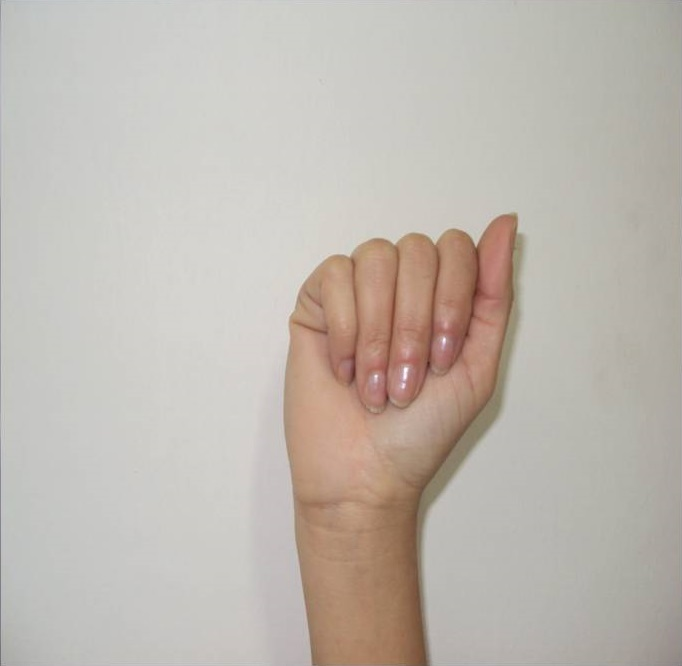

In [13]:
cv2_imshow(imagem)

In [0]:
imagem_copia = np.copy(imagem)

In [0]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]
proporcao = imagem_largura / imagem_altura

In [16]:
imagem_largura, imagem_altura, proporcao

(682, 666, 1.024024024024024)

# Define the image dimensions (input)


In [0]:
entrada_altura = 256
entrada_largura = int(((proporcao * entrada_altura) * 8) // 8)

In [18]:
entrada_altura, entrada_largura

(256, 262)

In [0]:
cor_pontoA, cor_pontoB, cor_linha = (14, 201, 255), (255, 0, 128), (192, 192, 192)
cor_txtponto = (10, 216, 245)

tamanho_fonte, tamanho_linha, tamanho_circulo, espessura = 5, 1, 4, 2

fonte = cv2.FONT_HERSHEY_SIMPLEX

# Convert image from opencv format to blob Caffe

In [0]:
entrada_blob = cv2.dnn.blobFromImage(imagem, 1.0 / 255, 
                                     (entrada_largura, entrada_altura), 
                                     (0, 0, 0), swapRB=False, crop=False)

# Output

In [0]:
modelo.setInput(entrada_blob)
saida = modelo.forward()

In [21]:
saida.shape

(1, 22, 32, 33)

# Plotting the outputs in the image

In [0]:
pontos = []
limite = 0.1
for i in range(numero_pontos):
    mapa_confianca = saida[0, i, :, :]
    mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))

    _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)

    if confianca > limite:
        cv2.circle(imagem_copia, (int(ponto[0]), int(ponto[1])), 5, cor_pontoA, 
                   thickness=espessura, lineType=cv2.FILLED)
        cv2.putText(imagem_copia, ' ' + (str(int(ponto[0]))) + ',' + 
                    str(int(ponto[1])), (int(ponto[0]), int(ponto[1])),
                    fonte, 0.3, cor_txtponto, 0, lineType=cv2.LINE_AA)

        cv2.circle(imagem, (int(ponto[0]), int(ponto[1])), tamanho_circulo,
                   cor_pontoA,
                   thickness=espessura, lineType=cv2.FILLED)
        cv2.putText(imagem, ' ' + "{}".format(i), (int(ponto[0]), 
                                                  int(ponto[1])), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3,
                    cor_txtponto,
                    0, lineType=cv2.LINE_AA)

        pontos.append((int(ponto[0]), int(ponto[1])))

    else:
        pontos.append((0, 0))

In [25]:
len(pontos)

22

In [26]:
pontos

[(361, 489),
 (423, 447),
 (485, 385),
 (486, 302),
 (506, 219),
 (464, 301),
 (465, 239),
 (465, 281),
 (444, 343),
 (423, 281),
 (423, 239),
 (423, 322),
 (423, 384),
 (361, 301),
 (362, 260),
 (361, 342),
 (382, 385),
 (319, 322),
 (320, 280),
 (340, 322),
 (341, 364),
 (0, 0)]

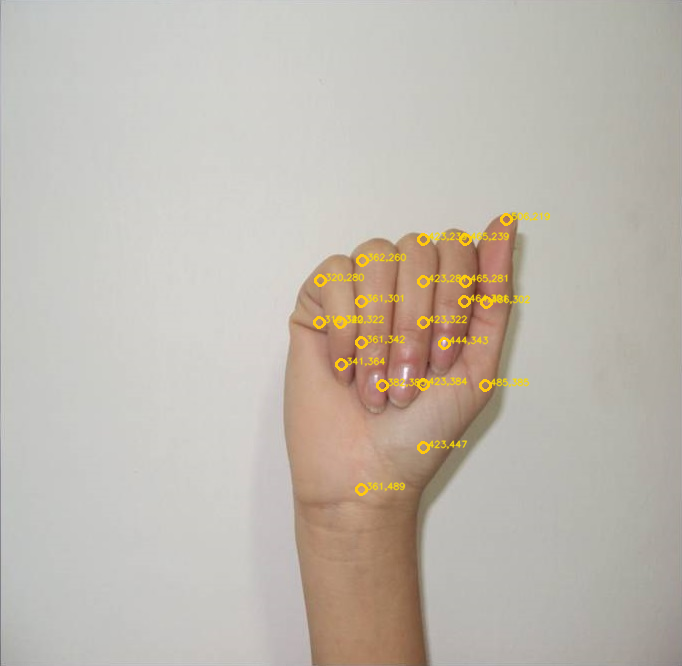

In [27]:
cv2_imshow(imagem_copia)

# Draw the skeleton

In [0]:
for par in pares_poses:
    parteA = par[0]
    parteB = par[1]

    if pontos[parteA] != (0, 0) and pontos[parteB] != (0, 0):
        cv2.line(imagem_copia, pontos[parteA], pontos[parteB], cor_linha, 
                 tamanho_linha, lineType=cv2.LINE_AA)
        cv2.line(imagem, pontos[parteA], pontos[parteB], cor_linha, tamanho_linha, 
                 lineType=cv2.LINE_AA)

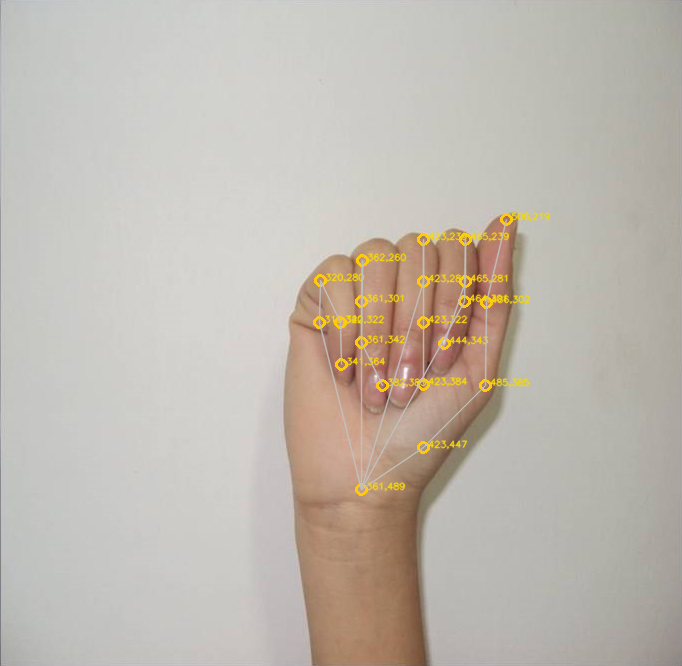

In [29]:
cv2_imshow(imagem_copia)

# Check finger and hand position

In [0]:
posicao.posicoes = []

In [0]:
# thumb
posicao.verificar_posicao_DEDOS(pontos[1:5], 'polegar', altura.verificar_altura_MAO(pontos))	

In [0]:
# index finger
posicao.verificar_posicao_DEDOS(pontos[5:9], 'indicador', altura.verificar_altura_MAO(pontos))

In [0]:
# Middle finger
posicao.verificar_posicao_DEDOS(pontos[9:13], 'medio', altura.verificar_altura_MAO(pontos))

In [0]:
# Ring finger
posicao.verificar_posicao_DEDOS(pontos[13:17], 'anelar', altura.verificar_altura_MAO(pontos))

In [0]:
# Little finger
posicao.verificar_posicao_DEDOS(pontos[17:21], 'minimo', altura.verificar_altura_MAO(pontos))

In [36]:
posicao.posicoes

['esticado vertical', 'dobrado', 'dobrado', 'dobrado', 'dobrado']

# Check the proximity of the fingers

In [0]:
p = proximidade.verificar_proximidade_DEDOS(pontos)

In [38]:
p

['polegar esticado vertical: afastado do indicador',
 'indicador dobrado: proximo ao medio',
 'medio dobrado: proximo ao anelar',
 'anelar dobrado: proximo ao minimo',
 'minimo dobrado: proximo ao anelar']

# Comparing the characteristics

In [0]:
for i, a in enumerate(alfabeto.letras):
  if proximidade.verificar_proximidade_DEDOS(pontos) == alfabeto.letras[i]:
    cv2.putText(imagem, ' ' + letras[i], (50,50), fonte, 1, cor_txtponto,
                tamanho_fonte, lineType=cv2.LINE_AA)

# Displaying the outputs

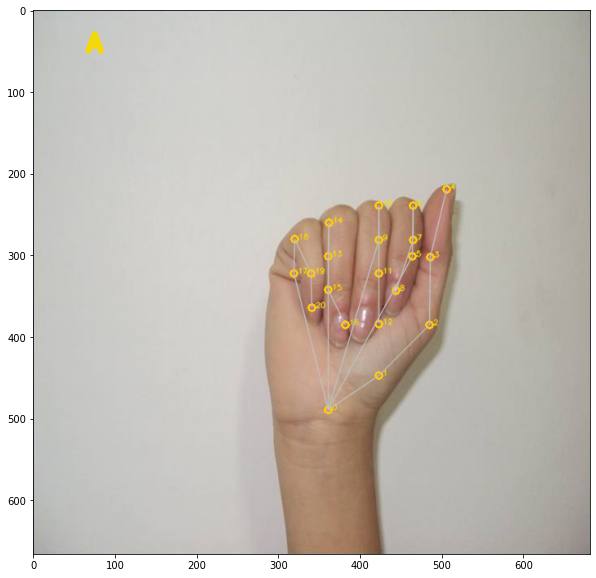

In [40]:
plt.figure(figsize= [14,10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB));